<a href="https://colab.research.google.com/github/dkd99/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS./blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_name=pd.read_csv('/content/drive/MyDrive/csv files/Zomato Restaurant names and Metadata.csv')

In [4]:
df_rev=pd.read_csv('/content/drive/MyDrive/csv files/Zomato Restaurant reviews.csv')

In [5]:
df_name.shape

(105, 6)

In [6]:
df_name.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
df_rev.shape

(10000, 7)

In [7]:
df_rev.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [8]:
df_rev.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [9]:
df_rev['Restaurant'].nunique()

100

In [10]:
df_name.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [11]:
df_name['Name'].nunique()

105

In [12]:
df_name['Cuisines'].nunique()

92

In [13]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [14]:
df_name['Cost']=df_name['Cost'].str.replace(',','').astype(int)

In [15]:
df_name['Cost'].describe()

count     105.000000
mean      861.428571
std       510.149730
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64

In [16]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [17]:
df_name.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [18]:
df_name.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


In [19]:
df_name[['Name','Cost']].sort_values('Cost',ascending=False).reset_index(drop=True).head(10)

,Name,Cost
0,Collage - Hyatt Hyderabad Gachibowli,2800
1,Feast - Sheraton Hyderabad Hotel,2500
2,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
3,10 Downing Street,1900
4,Cascade - Radisson Hyderabad Hitec City,1800
5,Zega - Sheraton Hyderabad Hotel,1750
6,Republic Of Noodles - Lemon Tree Hotel,1700
7,Mazzo - Marriott Executive Apartments,1700
8,Arena Eleven,1600
9,Barbeque Nation,1600


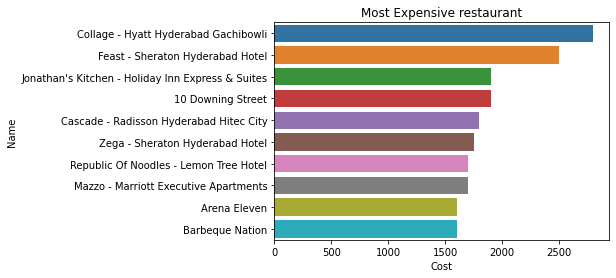

In [20]:
sns.barplot(x='Cost',
            y="Name", 
            data=df_name, 
            order=df_name.sort_values('Cost',ascending=False).Name[:10])

plt.title('Most Expensive restaurant')
plt.show()

In [21]:
df_name[['Name','Cost']].sort_values('Cost',ascending=False).reset_index(drop=True).tail(10)

,Name,Cost
95,Cream Stone,350
96,Shah Ghouse Spl Shawarma,300
97,Wich Please,250
98,Asian Meal Box,200
99,KS Bakers,200
100,Momos Delight,200
101,Hunger Maggi Point,200
102,Sweet Basket,200
103,Mohammedia Shawarma,150
104,Amul,150


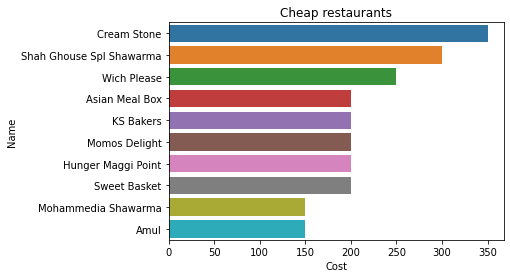

In [22]:
sns.barplot(x='Cost',
            y="Name", 
            data=df_name, 
            order=df_name.sort_values('Cost',ascending=False).Name[-10:])

plt.title('Cheap restaurants')
plt.show()

[Text(0.5, 1.0, 'Distribution of cost wrt different restaurents')]

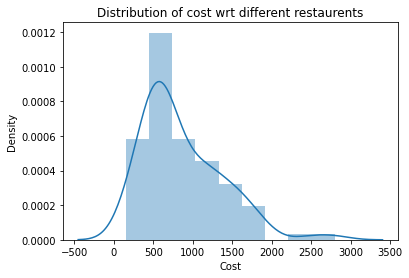

In [23]:
sns.distplot(df_name['Cost']).set(title='Distribution of cost wrt different restaurents')

In [24]:
df_name['Cuisines']

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [25]:
cuisine_list = df_name['Cuisines'].str.split(', ') 
cuis_dict = {} 
for cuisines in cuisine_list: 
    for name in cuisines:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 
cuis_df = pd.DataFrame(cuis_dict.values(),index = cuis_dict.keys(),columns = {'number of Restaurants which serve cuisine'}) 
cuis_df.sort_values(by = 'number of Restaurants which serve cuisine',ascending = False,inplace = True) 
cuis_df.reset_index(inplace=True)
top_5_cuisines = cuis_df[0:5]
print('The Top 5 Cuisines are:\n',top_5_cuisines)

The Top 5 Cuisines are:
           index  number of Restaurants which serve cuisine
0  North Indian                                         61
1       Chinese                                         43
2   Continental                                         21
3       Biryani                                         16
4     Fast Food                                         15


Text(0.5, 1.0, 'Most popular cuisines at Restaurants ')

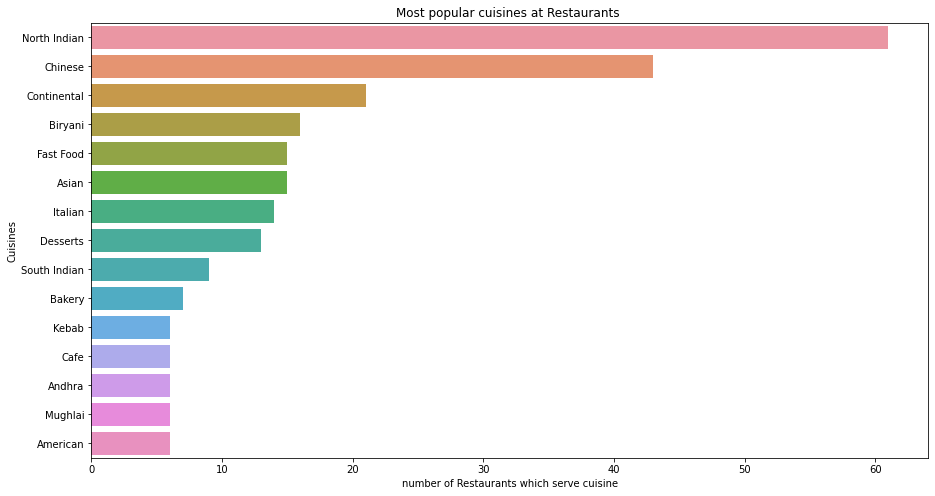

In [26]:
fig = plt.figure(figsize=[15,8])
sns.barplot(data=cuis_df[:15], y='index', x= 'number of Restaurants which serve cuisine')
plt.ylabel('Cuisines')

plt.xlabel('number of Restaurants which serve cuisine')
plt.title('Most popular cuisines at Restaurants ')

In [27]:
df_name['Collections']

0      Food Hygiene Rated Restaurants in Hyderabad, C...
1                                    Hyderabad's Hottest
2                     Great Buffets, Hyderabad's Hottest
3                                 Late Night Restaurants
4      Best Bars & Pubs, Food Hygiene Rated Restauran...
                             ...                        
100                                                  NaN
101                                                  NaN
102                                                  NaN
103                                                  NaN
104                                 Pan-Asian Delicacies
Name: Collections, Length: 105, dtype: object

In [28]:
df_name['Collections'].isna().sum()

54

In [29]:
df=df_name.dropna()

In [30]:
len(df)

51

In [31]:
df['Collections_list']=df_name['Collections'].dropna().str.split(', ')

In [32]:
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Collections_list
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","[Food Hygiene Rated Restaurants in Hyderabad, ..."
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,[Hyderabad's Hottest]
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM","[Great Buffets, Hyderabad's Hottest]"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,[Late Night Restaurants]
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...","[Best Bars & Pubs, Food Hygiene Rated Restaura..."


In [33]:
df['number of tags']=df['Collections_list'].apply(lambda x : len(x))


In [34]:
df

,Name,Links,Cost,Collections,Cuisines,Timings,Collections_list,number of tags
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","[Food Hygiene Rated Restaurants in Hyderabad, ...",6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,[Hyderabad's Hottest],1
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM","[Great Buffets, Hyderabad's Hottest]",2
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,[Late Night Restaurants],1
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...","[Best Bars & Pubs, Food Hygiene Rated Restaura...",5
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,1500,"Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P...","[Sunday Brunches, Corporate Favorites, Great B...",7
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,[Food Hygiene Rated Restaurants in Hyderabad],1
8,Hyper Local,https://www.zomato.com/hyderabad/hyper-local-g...,1000,"Great Buffets, Live Sports Screenings, Best Ba...","American, Chinese, North Indian, Kebab, South ...",12 Noon to 12 Midnight,"[Great Buffets, Live Sports Screenings, Best B...",4
9,Cream Stone,https://www.zomato.com/hyderabad/cream-stone-g...,350,Frozen Delights,"Ice Cream, Desserts","10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri...",[Frozen Delights],1
10,Sardarji's Chaats & More,https://www.zomato.com/hyderabad/sardarjis-cha...,400,"Street Food, Veggie Friendly, Pocket Friendly","Street Food, North Indian, Fast Food","12 Noon to 3:30 PM, 7 PM to 10:30 PM","[Street Food, Veggie Friendly, Pocket Friendly]",3


In [35]:
df[['Cost','number of tags']].corr()

,Cost,number of tags
Cost,1.000000,0.207433
number of tags,0.207433,1.000000


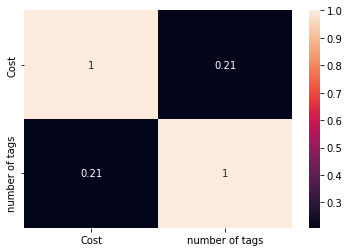

In [36]:
sns.heatmap(df[['Cost','number of tags']].corr(),annot=True)

In [37]:
Collections_list=df_name['Collections'].dropna().str.split(', ')
Collections_list.explode()

0      Food Hygiene Rated Restaurants in Hyderabad
0                              Corporate Favorites
0                                    Great Buffets
0                                        Top-Rated
0                                     Gold Curated
                          ...                     
87     Food Hygiene Rated Restaurants in Hyderabad
90                                     New on Gold
92                                 Sunday Brunches
96     Food Hygiene Rated Restaurants in Hyderabad
104                           Pan-Asian Delicacies
Name: Collections, Length: 106, dtype: object

Text(0.5, 1.0, 'restaurants with highest number of tags')

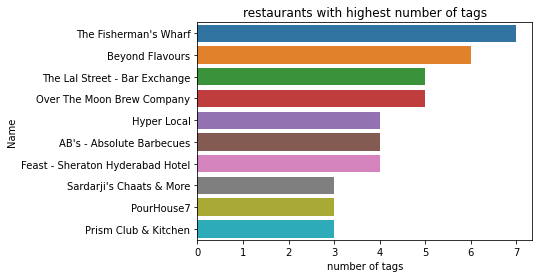

In [38]:
sns.barplot(x='number of tags',
            y='Name',
            data=df,
            order=df.sort_values('number of tags',ascending=False).Name[:10])
plt.title('restaurants with highest number of tags')

In [39]:
Collections_dict = {}
for lst in Collections_list:
    for tag in lst:
        if (tag in Collections_dict.keys()):
            Collections_dict[tag]+=1
        else:  
            Collections_dict[tag]=1

In [40]:
Collections_dict

{'Food Hygiene Rated Restaurants in Hyderabad': 8,
 'Corporate Favorites': 6,
 'Great Buffets': 11,
 'Top-Rated': 5,
 'Gold Curated': 5,
 'Live Sports Screenings': 7,
 "Hyderabad's Hottest": 7,
 'Late Night Restaurants': 2,
 'Best Bars & Pubs': 4,
 'Sunday Brunches': 4,
 'Trending This Week': 5,
 'Frozen Delights': 1,
 'Street Food': 1,
 'Veggie Friendly': 4,
 'Pocket Friendly': 1,
 'Barbecue & Grill': 3,
 'Happy Hours': 3,
 'Rooftops': 2,
 'Great Italian': 1,
 'Gigs and Events': 3,
 'Haleem': 1,
 'Mandi': 1,
 'The ‘Must Visit’ Eateries': 1,
 'Fancy and Fun': 2,
 'Great Breakfasts': 2,
 'Best shawarmas': 1,
 'Function Venues': 2,
 'Regional Favorites': 1,
 'Pan-Asian Delicacies': 2,
 'Terrific Thalis': 1,
 'Sneak Peek Hyderabad': 2,
 'Ramzan Mubarak': 1,
 'Best Milkshakes': 1,
 'Top Drinking Destinations': 1,
 'Best Bakeries': 1,
 'New on Gold': 2,
 'Brilliant Biryanis': 1}

In [41]:
Tags_df=pd.DataFrame(list(Collections_dict.items()),columns=['Tags','Count of tags'])

In [42]:
Tags_df.sort_values('Count of tags',ascending=False).reset_index(drop=True)

,Tags,Count of tags
0,Great Buffets,11
1,Food Hygiene Rated Restaurants in Hyderabad,8
2,Live Sports Screenings,7
3,Hyderabad's Hottest,7
4,Corporate Favorites,6
5,Top-Rated,5
6,Gold Curated,5
7,Trending This Week,5
8,Sunday Brunches,4
9,Veggie Friendly,4


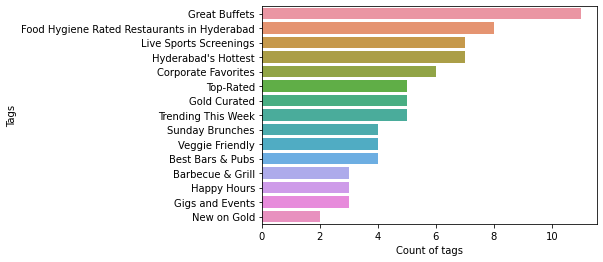

In [43]:
sns.barplot(x='Count of tags',y='Tags',data=Tags_df,order=Tags_df.sort_values('Count of tags',ascending=False).Tags[:15])

In [44]:
df_rev.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [45]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [46]:
df_rev.isnull().sum().index

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [47]:
df_rev.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [48]:
(df_rev.isnull().sum()/len(df_rev))*100

Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64

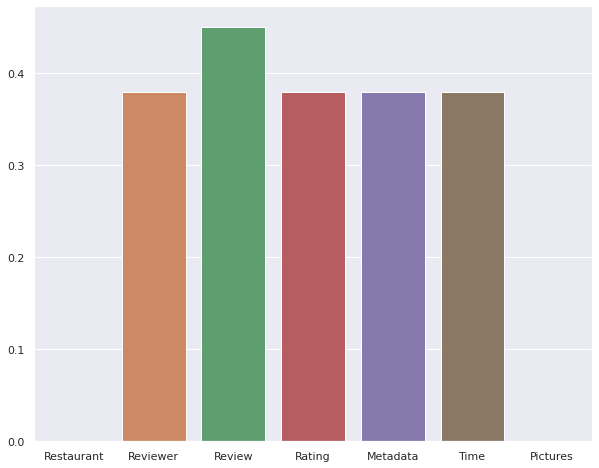

In [49]:
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.barplot(y=(df_rev.isnull().sum()/len(df_rev))*100,x=df_rev.isnull().sum().index)

In [50]:
df_rev.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [51]:
df_rev.loc[df_rev['Rating'] == 'Like'] = np.nan

df_rev['Rating'] = df_rev['Rating'].astype('float64')


In [52]:
df_rev.loc[df_rev['Rating'].isna(),'Rating']=df_rev.loc[~df_rev['Rating'].isna(),'Rating'].mean()

In [53]:
df_rev['Rating'].describe()

count    10000.000000
mean         3.601044
std          1.480565
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

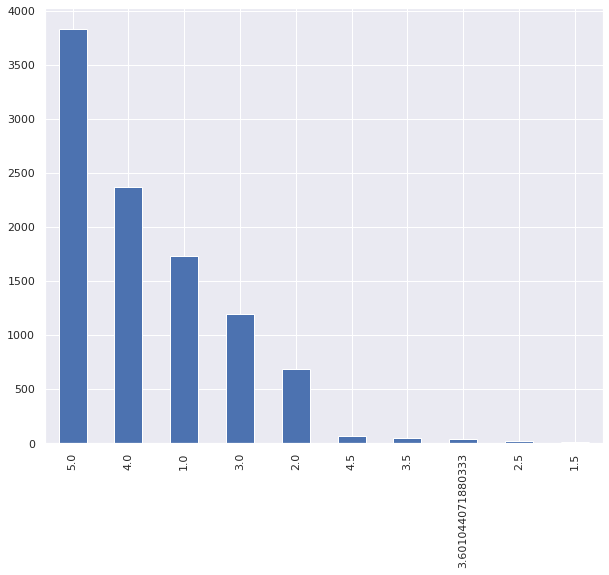

In [54]:
df_rev['Rating'].value_counts().plot(kind='bar')

In [55]:
rating_df=pd.DataFrame(df_rev.groupby(['Restaurant']).aggregate({'Rating':'mean'}).sort_values('Rating',ascending=False))

In [56]:
rating_df.head()

,Rating
Restaurant,
AB's - Absolute Barbecues,4.88
B-Dubs,4.81
"3B's - Buddies, Bar & Barbecue",4.76
Paradise,4.70
Flechazo,4.66


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

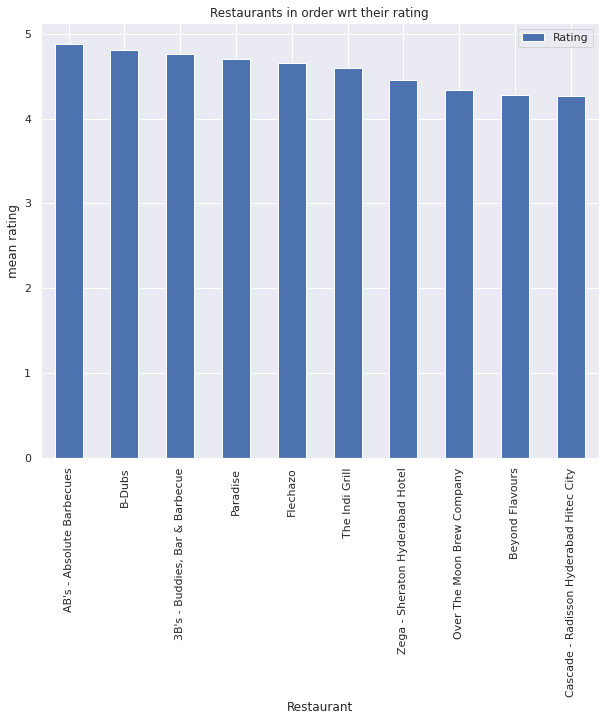

In [57]:
rating_df.head(10).plot(kind='bar',ylabel='mean rating',title='Restaurants in order wrt their rating')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings')

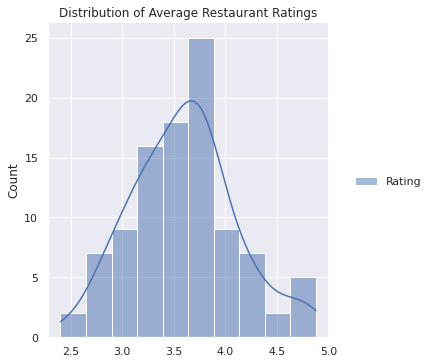

In [58]:
sns.displot(rating_df,kde=True)
plt.title('Distribution of Average Restaurant Ratings')


In [59]:
df_rev['Number of Reviews'],df_rev['Followers']=df_rev['Metadata'].str.split(',').str


In [60]:
df_rev.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Number of Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,1 Review,2 Followers
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,3 Reviews,2 Followers
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2 Reviews,3 Followers
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,1 Review,1 Follower
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,3 Reviews,2 Followers


In [61]:
df_rev['Number of Reviews'] = pd.to_numeric(df_rev['Number of Reviews'].str.split(' ').str[0])
df_rev['Followers'] = pd.to_numeric(df_rev['Followers'].str.split(' ').str[1])

In [62]:
df_rev.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Number of Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,3.0,2.0


Text(0.5, 1.0, 'Number of reviews given by  customers')

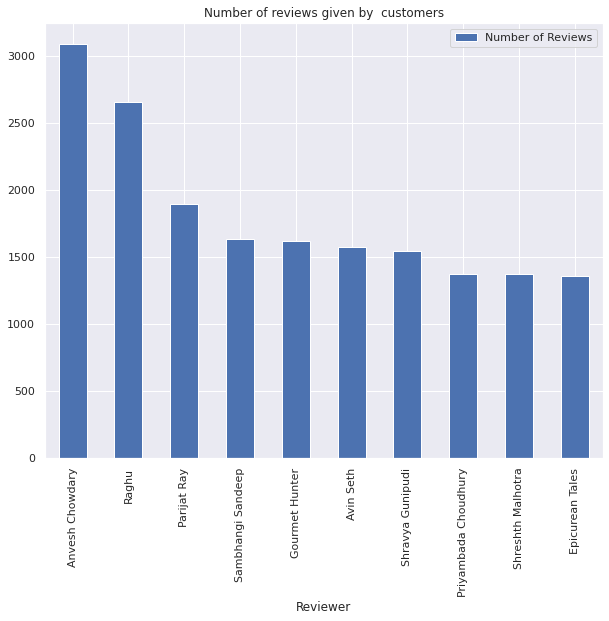

In [63]:
df_rev.groupby(['Reviewer']).aggregate({'Number of Reviews':'sum'}).sort_values('Number of Reviews',ascending=False)[:10].plot(kind='bar')
plt.title('Number of reviews given by  customers')

In [64]:
df_rev.groupby(['Restaurant','Reviewer']).aggregate({'Number of Reviews':'sum'}).sort_values('Number of Reviews',ascending=False)[:10]

,,Number of Reviews
Restaurant,Reviewer,
Pista House,Anvesh Chowdary,1031.0
Labonel,Anvesh Chowdary,1031.0
Collage - Hyatt Hyderabad Gachibowli,Anvesh Chowdary,1031.0
Owm Nom Nom,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685.0
The Old Madras Baking Company,Abc098,665.0
Aromas@11SIX,Mithun Ravindranathan,560.0
Hyderabadi Daawat,Mohd Zubair Ali (Hyderabad.Food.Diaries),482.0
Chinese Pavilion,Bhargava Krishna,472.0
Tempteys,Epicurean Tales,452.0


Text(0.5, 1.0, 'number of reviews by a customer for a particular restaurant')

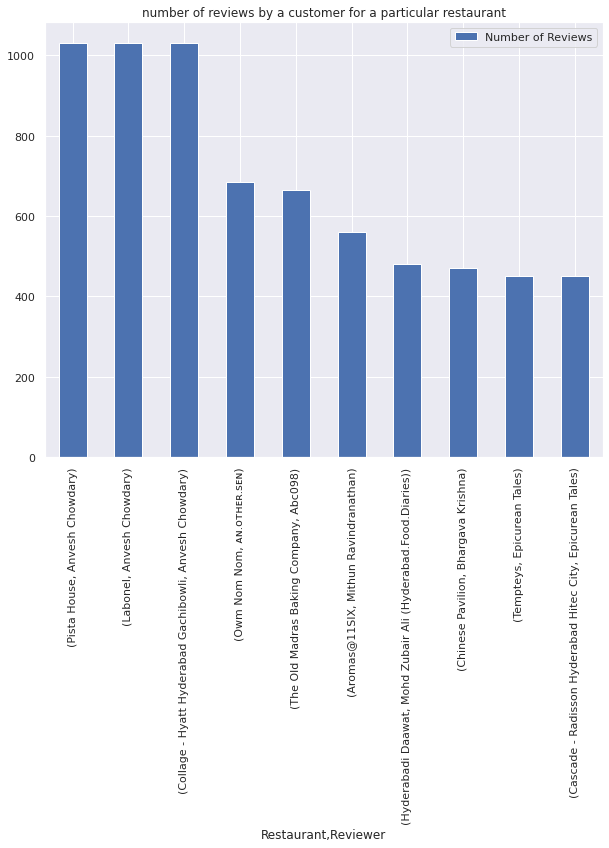

In [65]:
df_rev.groupby(['Restaurant','Reviewer']).aggregate({'Number of Reviews':'sum'}).sort_values('Number of Reviews',ascending=False)[:10].plot(kind='bar')
plt.title('number of reviews by a customer for a particular restaurant')

In [66]:
df_rev = df_rev.drop(['Metadata'], axis =1)

In [67]:
df_rev['Time']=pd.to_datetime(df_rev['Time'])
df_rev['Year'] = df_rev['Time'].dt.year
df_rev['Month'] = df_rev['Time'].dt.month
df_rev['Hour'] = df_rev['Time'].dt.hour

In [68]:
df_rev

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Number of Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0.0,53.0,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0.0,2.0,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3.0,65.0,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0.0,13.0,144.0,2016.0,5.0,17.0


In [69]:
df_rev.groupby(['Restaurant','Reviewer']).aggregate({'Pictures':'sum'}).sort_values('Pictures',ascending=False)[:10]

,,Pictures
Restaurant,Reviewer,
Arena Eleven,Anvith Devulapally,64.0
Pista House,Food Nawabs,52.0
Ulavacharu,Food Nawabs,42.0
PourHouse7,Akshith,42.0
Deli 9 Bistro,Food Nawabs,41.0
PourHouse7,Hydfoodiesisters,37.0
Driven Cafe,ChicLifeByte,34.0
Collage - Hyatt Hyderabad Gachibowli,Vijaya,34.0
Hyderabadi Daawat,BeingHydFoodie,32.0


Text(0, 0.5, 'number of picture reviews')

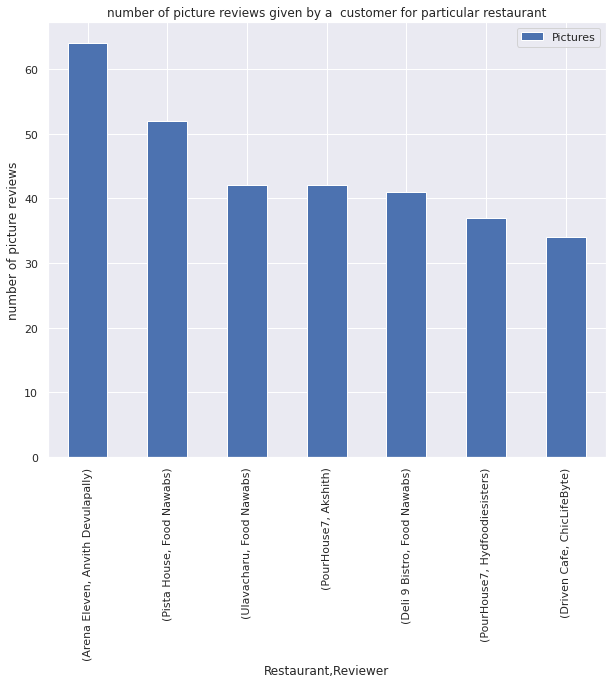

In [70]:
df_rev.groupby(['Restaurant','Reviewer']).aggregate({'Pictures':'sum'}).sort_values('Pictures',ascending=False)[:7].plot(kind='bar')
plt.title('number of picture reviews given by a  customer for particular restaurant')
plt.ylabel('number of picture reviews')

In [71]:
year_rating_df_2018=df_rev[df_rev['Year']==2018].groupby(['Restaurant']).aggregate({'Rating':'mean'})

In [72]:
year_rating_df_2019=df_rev[df_rev['Year']==2019].groupby(['Restaurant']).aggregate({'Rating':'mean'})

In [73]:
year_rating_df_2019.head(5)

,Rating
Restaurant,
10 Downing Street,3.820896
13 Dhaba,3.333333
"3B's - Buddies, Bar & Barbecue",4.760000
AB's - Absolute Barbecues,4.880000
Absolute Sizzlers,3.620000


In [74]:
year_rating_df_2018.head(5)

,Rating
Restaurant,
10 Downing Street,3.757576
13 Dhaba,3.573770
Al Saba Restaurant,3.246753
American Wild Wings,4.000000
Amul,4.000000


In [75]:
rating_comp_df = year_rating_df_2018.merge(year_rating_df_2019, how = 'inner', on = 'Restaurant')


In [76]:
rating_comp_df.head(5)

,Rating_x,Rating_y
Restaurant,,
10 Downing Street,3.757576,3.820896
13 Dhaba,3.573770,3.333333
Al Saba Restaurant,3.246753,2.500000
American Wild Wings,4.000000,3.962264
Amul,4.000000,3.600000


In [77]:
rating_comp_df['diff']=rating_comp_df['Rating_y']-rating_comp_df['Rating_x']

In [78]:
rating_comp_df.sort_values('diff',ascending=False,inplace=True)

In [79]:
rating_comp_df[rating_comp_df['diff']>0]['diff']

Restaurant
Delhi-39                                   1.400344
Dine O China                               1.100508
Karachi Bakery                             0.848806
Eat India Company                          0.766544
Sardarji's Chaats & More                   0.540000
Pista House                                0.508181
Cascade - Radisson Hyderabad Hitec City    0.429971
Cafe Eclat                                 0.393393
Pakwaan Grand                              0.386592
Khaan Saab                                 0.326087
Frio Bistro                                0.291667
The Foodie Monster Kitchen                 0.285714
Cream Stone                                0.282853
Driven Cafe                                0.274704
Squeeze @ The Lime                         0.222892
Banana Leaf Multicuisine Restaurant        0.211019
Hunger Maggi Point                         0.210989
Diners Pavilion                            0.210989
Deli 9 Bistro                              0.207283
K

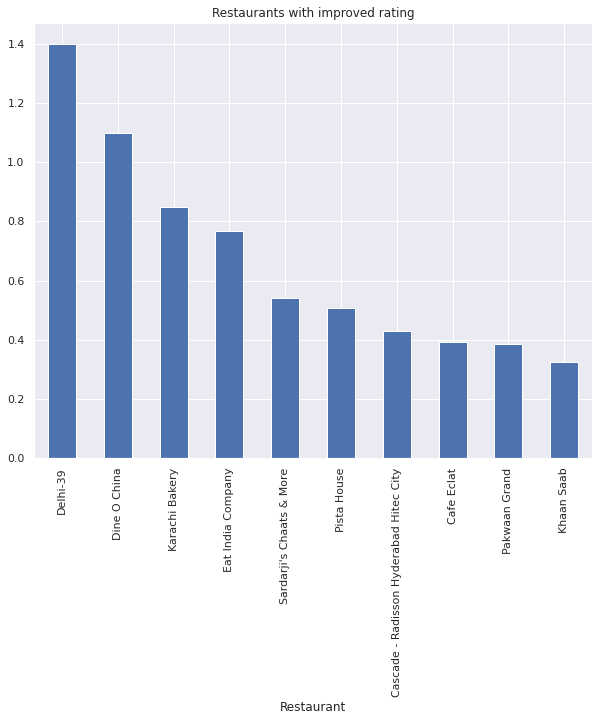

In [80]:
rating_comp_df[rating_comp_df['diff']>0]['diff'].head(10).plot(kind='bar',title='Restaurants with improved rating')

In [81]:
rating_comp_df[rating_comp_df['diff']<0]['diff']

Restaurant
The Chocolate Room                                  -0.015152
American Wild Wings                                 -0.037736
Komatose - Holiday Inn Express & Suites             -0.049053
Zega - Sheraton Hyderabad Hotel                     -0.052448
Desi Bytes                                          -0.111111
Chinese Pavilion                                    -0.136364
Asian Meal Box                                      -0.148148
Hyderabad Chefs                                     -0.152482
Urban Asia - Kitchen & Bar                          -0.186688
Mazzo - Marriott Executive Apartments               -0.201087
Gal Punjab Di                                       -0.203704
13 Dhaba                                            -0.240437
Behrouz Biryani                                     -0.246667
Udipi's Upahar                                      -0.255556
Labonel                                             -0.270588
Aromas@11SIX                                        -0.2763

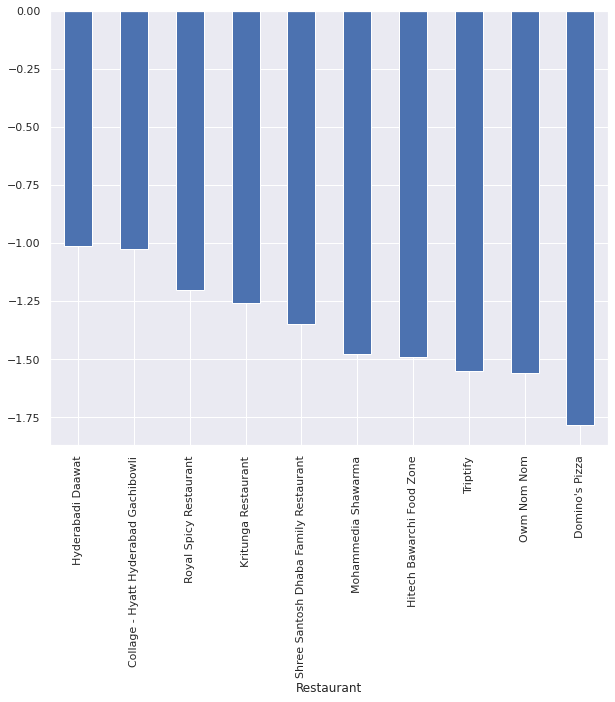

In [82]:
rating_comp_df[rating_comp_df['diff']<0]['diff'].tail(10).plot(kind='bar')

<Figure size 1440x720 with 0 Axes>

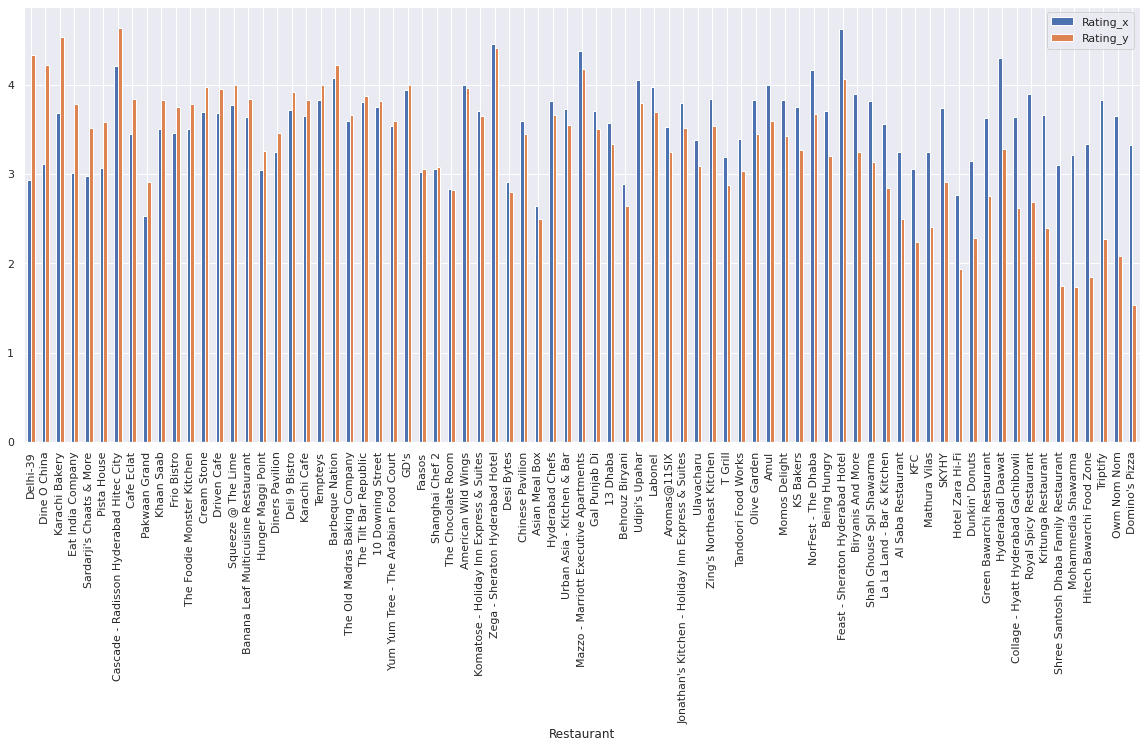

In [83]:
plt.figure(figsize=(20,10))
rating_comp_df[['Rating_x','Rating_y']].plot(kind='bar',figsize=(20,8))

In [84]:
df_rev['Followers'].fillna(0,inplace=True)

In [85]:
df_rev.isna().sum()

Restaurant            1
Reviewer             39
Review               46
Rating                0
Time                 39
Pictures              1
Number of Reviews    39
Followers             0
Year                 39
Month                39
Hour                 39
dtype: int64

In [86]:
df_rev.dropna(inplace=True)

In [87]:
df_rev.isna().sum()

Restaurant           0
Reviewer             0
Review               0
Rating               0
Time                 0
Pictures             0
Number of Reviews    0
Followers            0
Year                 0
Month                0
Hour                 0
dtype: int64

Text(0.5, 1.0, 'Top 10 Reviewers by no of Followers')

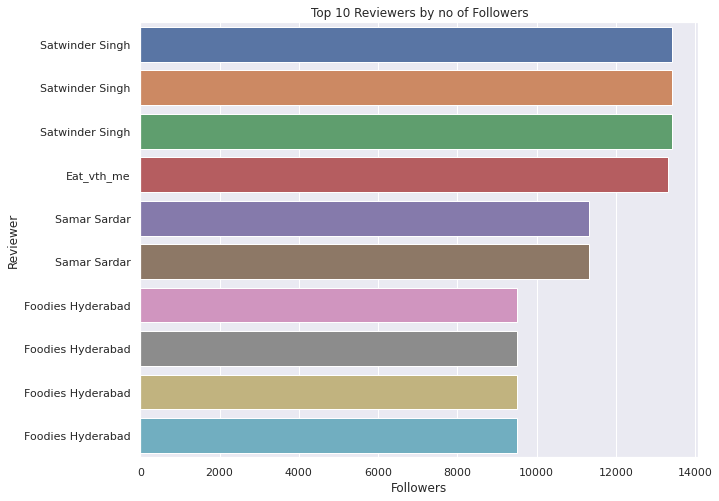

In [88]:
sns.barplot(data=df_rev, x='Followers', y='Reviewer', order=df_rev.sort_values('Followers',ascending=False).Reviewer[:10])
plt.title('Top 10 Reviewers by no of Followers')

[Text(0.5, 0, 'Number of reviews'), Text(0.5, 1.0, 'Reviews vs Month')]

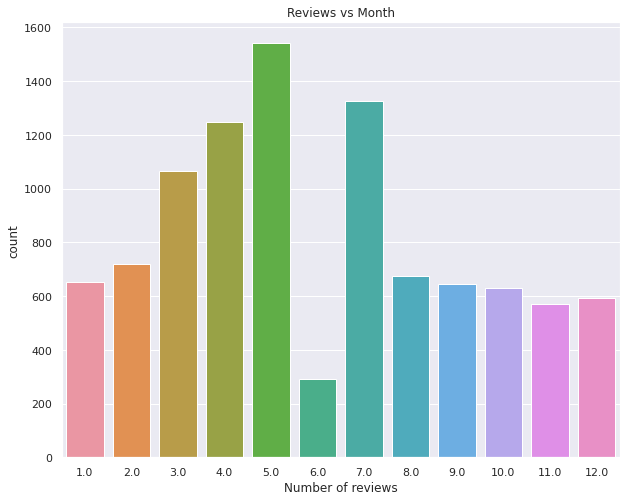

In [89]:
sns.countplot(df_rev['Month']).set(title='Reviews vs Month',xlabel='Number of reviews')

[Text(0.5, 0, 'Number of reviews'), Text(0.5, 1.0, 'Reviews vs Year')]

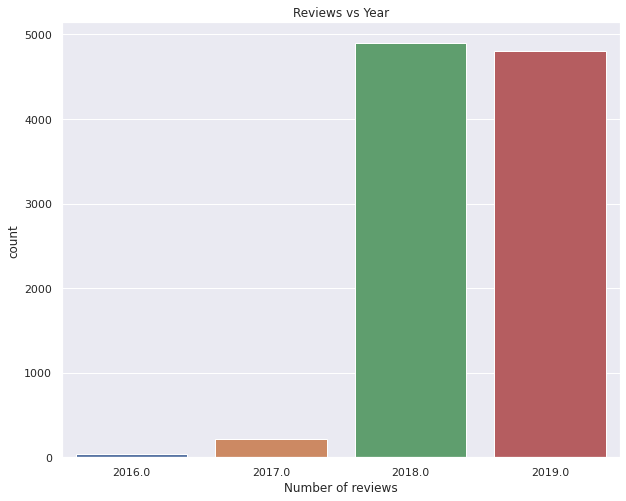

In [90]:
sns.countplot(df_rev['Year']).set(title='Reviews vs Year',xlabel='Number of reviews')

[Text(0.5, 0, 'Number of reviews'), Text(0.5, 1.0, 'Reviews vs Hour')]

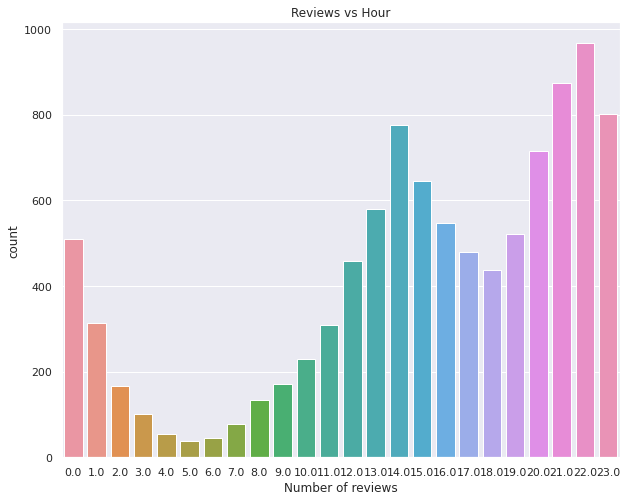

In [91]:
sns.countplot(df_rev['Hour']).set(title='Reviews vs Hour',xlabel='Number of reviews')

In [92]:
df_name.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [93]:
def cuisine_list(cuisines):
  
   
   cuisines_list = list(set(cuisines.split(', ')))
   return cuisines_list

In [94]:
df_name['cuisines_list']=df_name['Cuisines'].apply(lambda x:cuisine_list(x))


In [95]:
df_name.head(1)

,Name,Links,Cost,Collections,Cuisines,Timings,cuisines_list
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","[Continental, Chinese, European, North Indian,..."


In [96]:
df_name['number of cuisines']=df_name['cuisines_list'].apply( lambda x:len(x))

In [97]:
df_name['Collections_list']=df['Collections_list']=df_name['Collections'].dropna().str.split(', ')

In [98]:
df_name.head(1)

,Name,Links,Cost,Collections,Cuisines,Timings,cuisines_list,number of cuisines,Collections_list
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","[Continental, Chinese, European, North Indian,...",6,"[Food Hygiene Rated Restaurants in Hyderabad, ..."


In [99]:
df_name.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'cuisines_list', 'number of cuisines', 'Collections_list'],
      dtype='object')

In [100]:
rating_df.rename(columns={'Restaurant':'Name'},inplace=True)

In [101]:
rating_df['Name']=rating_df.index

In [102]:
rating_df.reset_index(drop=True)

,Rating,Name
0,4.880,AB's - Absolute Barbecues
1,4.810,B-Dubs
2,4.760,"3B's - Buddies, Bar & Barbecue"
3,4.700,Paradise
4,4.660,Flechazo
...,...,...
95,2.825,Behrouz Biryani
96,2.820,Mathura Vilas
97,2.710,Pakwaan Grand
98,2.580,Asian Meal Box


In [103]:
df_name_new=pd.merge(rating_df,df_name,how='inner',left_on='Name',right_on='Name')

In [104]:
df_name_new.head(1)

,Rating,Name,Links,Cost,Collections,Cuisines,Timings,cuisines_list,number of cuisines,Collections_list
0,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM","[North Indian, Mediterranean, European]",3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."


In [105]:
df_name_new=df_name_new.explode('cuisines_list')

In [106]:
df_name_new.reset_index(drop=True,inplace=True)

In [107]:
df_name_new.head(8)

,Rating,Name,Links,Cost,Collections,Cuisines,Timings,cuisines_list,number of cuisines,Collections_list
0,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",North Indian,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
1,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",Mediterranean,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
2,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",European,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
3,4.81,B-Dubs,https://www.zomato.com/hyderabad/b-dubs-gachib...,1600,Hyderabad's Hottest,American,"11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11a...",American,1,[Hyderabad's Hottest]
4,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",North Indian,3,"[Barbecue & Grill, Live Sports Screenings]"
5,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",Mediterranean,3,"[Barbecue & Grill, Live Sports Screenings]"
6,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",European,3,"[Barbecue & Grill, Live Sports Screenings]"
7,4.70,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,North Indian,3,[Hyderabad's Hottest]


In [108]:
df_name_new.shape

(301, 10)

In [109]:
df_name_new.columns

Index(['Rating', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'cuisines_list', 'number of cuisines', 'Collections_list'],
      dtype='object')

In [110]:
set(df_name_new['cuisines_list'])

{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Italian',
 'Japanese',
 'Juices',
 'Kebab',
 'Lebanese',
 'Mediterranean',
 'Mexican',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Pizza',
 'Salad',
 'Seafood',
 'South Indian',
 'Spanish',
 'Street Food',
 'Sushi',
 'Thai',
 'Wraps'}

In [111]:
df_name_new['cuisines_list']

0       North Indian
1      Mediterranean
2           European
3           American
4       North Indian
           ...      
296          Chinese
297          Biryani
298            Asian
299     North Indian
300          Chinese
Name: cuisines_list, Length: 301, dtype: object

In [112]:
lst=[]
for i in df_name_new['cuisines_list']:
  if (i=='Hyderabadi')|(i=='Kebab')|(i=='Biryani')|(i=='Mughlai'):
    lst.append('Mughal food')
  if (i=='Fast Food')|(i=='Street Food')|(i=='Finger Food'):
    lst.append('junk food')
  if (i=='Andhra')|(i=='South Indian')|(i=='North Eastern')|(i=='North Indian')|(i=='Modern Indian')|(i=='Healthy Food')|(i=='Salad'):
    lst.append('Indian')
  if (i=='Thai')|(i=='Asian')|(i=='Chinese')|(i=='Japanese')|(i=='Seafood')|(i=='Sushi')|(i=='Indonesian')|(i=='Momos')|(i=='Goan'):
    lst.append('Southeast Asian')
  if (i=='Arabian')|(i=='Lebanese')|(i=='Mediterranean'):
    lst.append('Middle eastern')
  if (i=='American')|(i=='Pizza')|(i=='Burger')|(i=='Wraps')|(i=='Mexican')|(i=='BBQ'):
    lst.append('American')
  if (i=='European')|(i=='Spanish')|(i=='Continental')|(i=='Italian'):
    lst.append('Continental')
  if (i=='Bakery')|(i=='Beverages')|(i=='Desserts')|(i=='Juices')|(i=='Ice Cream')|(i=='Mithai')|(i=='Cafe'):
    lst.append('Dessert')



In [113]:
cuisines=pd.DataFrame(lst)
cuisines.columns=['cuisine']
cuisines

,cuisine
0,Indian
1,Middle eastern
2,Continental
3,American
4,Indian
...,...
296,Southeast Asian
297,Mughal food
298,Southeast Asian
299,Indian


In [114]:
cuisines.isnull().sum()

cuisine    0
dtype: int64

In [115]:
cuisines.value_counts()

cuisine        
Indian             83
Southeast Asian    73
Continental        40
Dessert            33
Mughal food        31
junk food          17
American           16
Middle eastern      8
dtype: int64

In [116]:
df_cuisine=pd.concat([df_name_new[['Rating','Name','Cost','number of cuisines']],cuisines],axis=1)

In [117]:
df_cuisine.head(5)

,Rating,Name,Cost,number of cuisines,cuisine
0,4.88,AB's - Absolute Barbecues,1500,3,Indian
1,4.88,AB's - Absolute Barbecues,1500,3,Middle eastern
2,4.88,AB's - Absolute Barbecues,1500,3,Continental
3,4.81,B-Dubs,1600,1,American
4,4.76,"3B's - Buddies, Bar & Barbecue",1100,3,Indian


In [118]:
df_cuisine[['Rating','Cost']].corr()

,Rating,Cost
Rating,1.000000,0.374804
Cost,0.374804,1.000000


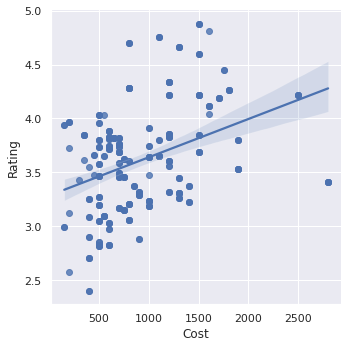

In [119]:
sns.lmplot(x='Cost',y='Rating',data=df_cuisine)

In [120]:
df_cuisine=pd.get_dummies(df_cuisine,columns=["cuisine"],prefix=None)

In [121]:
df_cuisine.head(5)

,Rating,Name,Cost,number of cuisines,cuisine_American,cuisine_Continental,cuisine_Dessert,cuisine_Indian,cuisine_Middle eastern,cuisine_Mughal food,cuisine_Southeast Asian,cuisine_junk food
0,4.88,AB's - Absolute Barbecues,1500,3,0,0,0,1,0,0,0,0
1,4.88,AB's - Absolute Barbecues,1500,3,0,0,0,0,1,0,0,0
2,4.88,AB's - Absolute Barbecues,1500,3,0,1,0,0,0,0,0,0
3,4.81,B-Dubs,1600,1,1,0,0,0,0,0,0,0
4,4.76,"3B's - Buddies, Bar & Barbecue",1100,3,0,0,0,1,0,0,0,0


In [122]:
cuisine=list(set(df_cuisine.columns)-set(['Name','Cost','number of cuisines','Rating']))


In [123]:
df_cluster=df_cuisine.groupby(['Rating','Name','Cost','number of cuisines'])[cuisine].sum().reset_index()


In [124]:
cuisine+['Rating','Cost']

['cuisine_Southeast Asian',
 'cuisine_junk food',
 'cuisine_Continental',
 'cuisine_Mughal food',
 'cuisine_Middle eastern',
 'cuisine_American',
 'cuisine_Dessert',
 'cuisine_Indian',
 'Rating',
 'Cost']

In [125]:
df_final=df_cluster[['Rating','Cost']+cuisine]

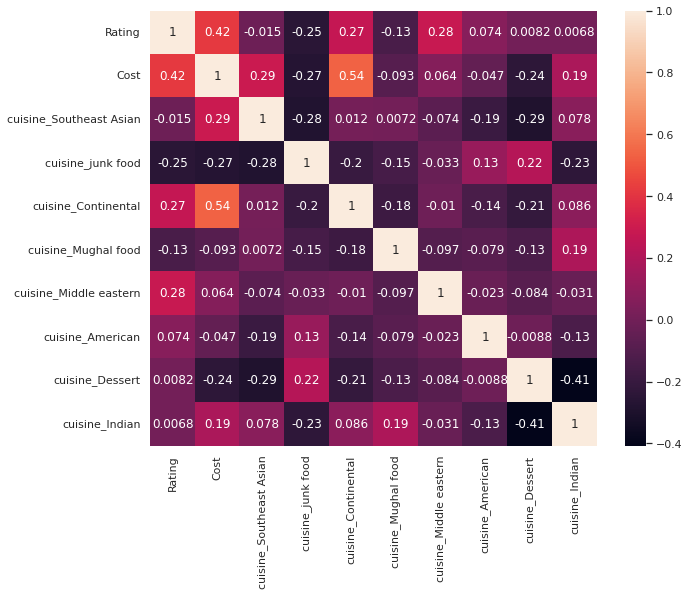

In [126]:
sns.heatmap(df_final.corr(),annot=True)

In [127]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rating                   100 non-null    float64
 1   Cost                     100 non-null    int64  
 2   cuisine_Southeast Asian  100 non-null    uint8  
 3   cuisine_junk food        100 non-null    uint8  
 4   cuisine_Continental      100 non-null    uint8  
 5   cuisine_Mughal food      100 non-null    uint8  
 6   cuisine_Middle eastern   100 non-null    uint8  
 7   cuisine_American         100 non-null    uint8  
 8   cuisine_Dessert          100 non-null    uint8  
 9   cuisine_Indian           100 non-null    uint8  
dtypes: float64(1), int64(1), uint8(8)
memory usage: 2.5 KB


In [128]:
df_final.head(5)

,Rating,Cost,cuisine_Southeast Asian,cuisine_junk food,cuisine_Continental,cuisine_Mughal food,cuisine_Middle eastern,cuisine_American,cuisine_Dessert,cuisine_Indian
0,2.400,400,1,0,0,0,0,0,0,1
1,2.580,200,1,0,0,0,0,0,0,0
2,2.710,400,1,0,0,1,0,0,0,1
3,2.820,500,1,0,0,0,0,0,0,2
4,2.825,600,0,0,0,2,0,0,0,0


In [129]:
x=list(set(list(df_final.columns))-{'Rating','Cost'})

In [130]:
x

['cuisine_Southeast Asian',
 'cuisine_junk food',
 'cuisine_Continental',
 'cuisine_Mughal food',
 'cuisine_Middle eastern',
 'cuisine_American',
 'cuisine_Dessert',
 'cuisine_Indian']

In [131]:
ms=MinMaxScaler()
df_final_scaled=ms.fit_transform(df_final[['Rating','Cost']])
df_final_scaled

array([[0.        , 0.09433962],
       [0.07258065, 0.01886792],
       [0.125     , 0.09433962],
       [0.16935484, 0.13207547],
       [0.17137097, 0.16981132],
       [0.1733871 , 0.13207547],
       [0.1733871 , 0.16981132],
       [0.18145161, 0.13207547],
       [0.19354839, 0.28301887],
       [0.2016129 , 0.09433962],
       [0.23185484, 0.16981132],
       [0.23790323, 0.        ],
       [0.25403226, 0.16981132],
       [0.26209677, 0.13207547],
       [0.26612903, 0.24528302],
       [0.27822581, 0.09433962],
       [0.28024194, 0.1509434 ],
       [0.29032258, 0.01886792],
       [0.30443548, 0.22641509],
       [0.31048387, 0.20754717],
       [0.31854839, 0.32075472],
       [0.32258065, 0.13207547],
       [0.3266129 , 0.24528302],
       [0.33266129, 0.47169811],
       [0.33467742, 0.32075472],
       [0.34274194, 0.09433962],
       [0.34677419, 0.43396226],
       [0.35080645, 0.13207547],
       [0.35887097, 0.28301887],
       [0.36693548, 0.43396226],
       [0.

In [132]:
list(df_final_scaled[:,0])

[0.0,
 0.07258064516129048,
 0.125,
 0.1693548387096775,
 0.17137096774193572,
 0.17338709677419373,
 0.17338709677419373,
 0.18145161290322598,
 0.19354838709677424,
 0.2016129032258065,
 0.2318548387096775,
 0.23790322580645173,
 0.254032258064516,
 0.2620967741935485,
 0.2661290322580645,
 0.278225806451613,
 0.2802419354838712,
 0.2903225806451615,
 0.30443548387096775,
 0.310483870967742,
 0.31854838709677424,
 0.3225806451612905,
 0.3266129032258065,
 0.33266129032258074,
 0.33467741935483875,
 0.342741935483871,
 0.346774193548387,
 0.35080645161290325,
 0.3588709677419355,
 0.36693548387096775,
 0.370967741935484,
 0.370967741935484,
 0.3911290322580647,
 0.3911290322580647,
 0.4072580645161292,
 0.4153225806451615,
 0.4233870967741937,
 0.42741935483870974,
 0.42741935483870974,
 0.431451612903226,
 0.435483870967742,
 0.435483870967742,
 0.43951612903225823,
 0.45766129032258074,
 0.46370967741935476,
 0.467741935483871,
 0.47580645161290325,
 0.4798387096774195,
 0.487903225

In [133]:
df_scaled=pd.concat([pd.DataFrame({'Rating':list(df_final_scaled[:,0]),'Cost':list(df_final_scaled[:,1])}),df_final[x]],axis=1)

In [134]:
df_scaled.values

array([[0.        , 0.09433962, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.07258065, 0.01886792, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.125     , 0.09433962, 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ],
       [0.16935484, 0.13207547, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.        ],
       [0.17137097, 0.16981132, 0.        , 0.        , 0.        ,
        2.        , 0.        , 0.        , 0.        , 0.        ],
       [0.1733871 , 0.13207547, 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.1733871 , 0.16981132, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.        , 0.        ],
       [0.18145161, 0.13207547, 0.       

In [135]:
df_scaled.shape

(100, 10)

In [136]:
from sklearn import metrics

k_range = range(2, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df_scaled.values)
    scores.append(metrics.silhouette_score(df_scaled.values, km.labels_))

In [137]:
scores

[0.23242430122755453,
 0.26460422077160944,
 0.2661915786283879,
 0.26974202408663456,
 0.2633386182577816,
 0.25769028510117525,
 0.26581233953406713,
 0.26325754305656107,
 0.2702190648481159,
 0.26837829820423487]

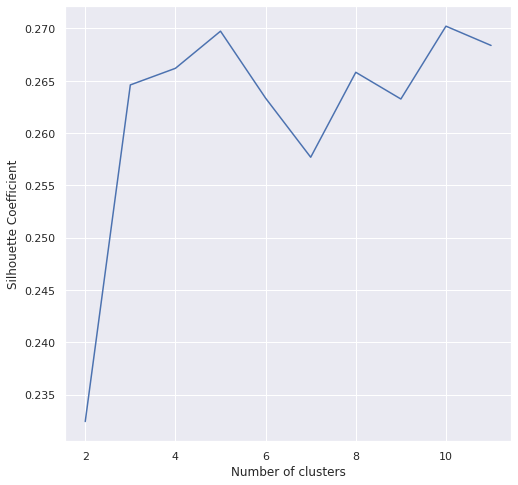

In [138]:
# plot the results
plt.figure(figsize=(8,8))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [139]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit_transform(df_scaled)
    cluster_errors.append( clusters.inertia_ )
    
cluster_errors

[329.9694781456694,
 258.96845917540236,
 214.55203066237965,
 173.26791077242376,
 148.98151161127993,
 130.12154980227248,
 115.60958410641587,
 108.03874650087488,
 98.80040114068777,
 96.50444331547337,
 91.85137811488102,
 84.9034483389457,
 83.13116782668422,
 74.41063170274552]

In [140]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:9]

,num_clusters,cluster_errors
0,1,329.969478
1,2,258.968459
2,3,214.552031
3,4,173.267911
4,5,148.981512
5,6,130.121550
6,7,115.609584
7,8,108.038747
8,9,98.800401


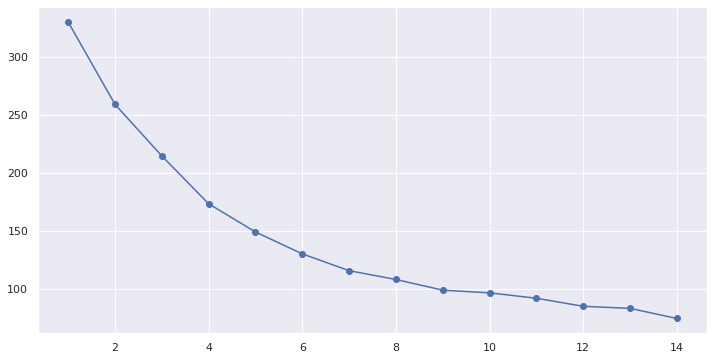

In [141]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [142]:
X=df_scaled.values

In [143]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.20125779034448027
For n_clusters = 3 The average silhouette_score is : 0.26460422077160944
For n_clusters = 4 The average silhouette_score is : 0.26356095326839707
For n_clusters = 5 The average silhouette_score is : 0.2691583464768057
For n_clusters = 6 The average silhouette_score is : 0.2701625719145743
For n_clusters = 7 The average silhouette_score is : 0.2774351159359276
For n_clusters = 8 The average silhouette_score is : 0.281288602665559
For n_clusters = 9 The average silhouette_score is : 0.2565277198066094
For n_clusters = 10 The average silhouette_score is : 0.26886339543019294
For n_clusters = 11 The average silhouette_score is : 0.2713870298998293


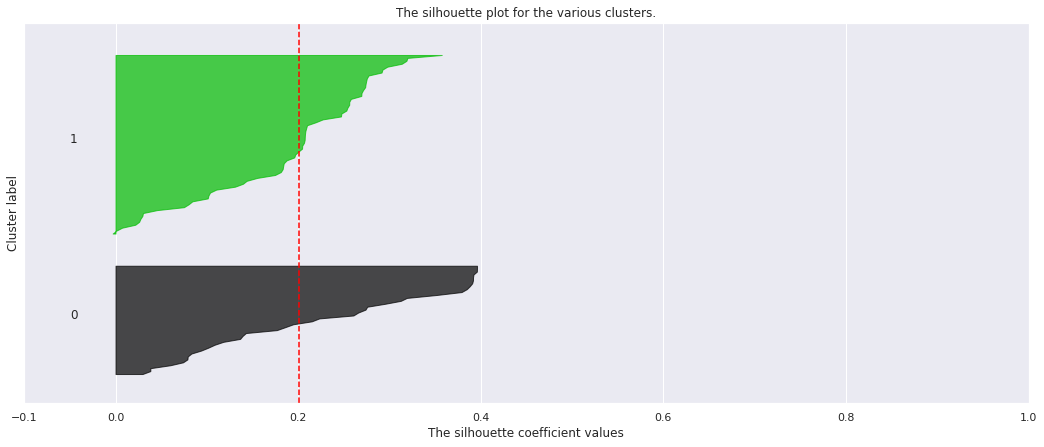

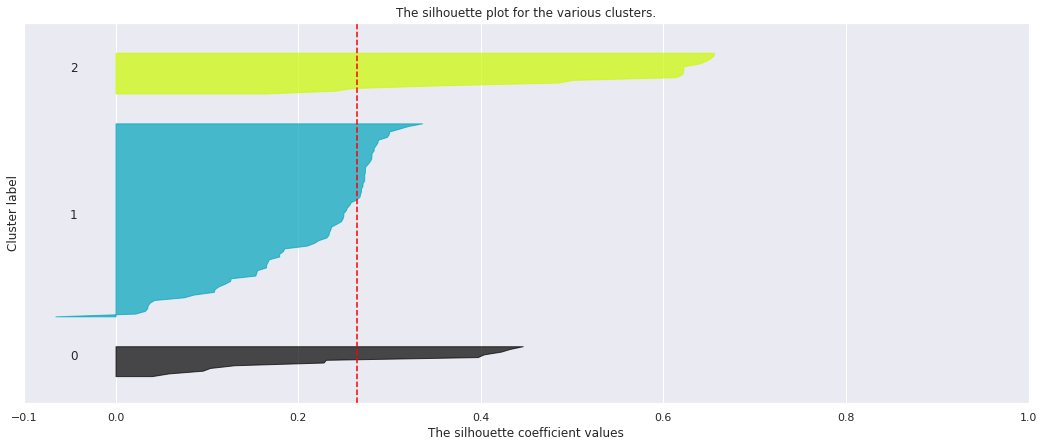

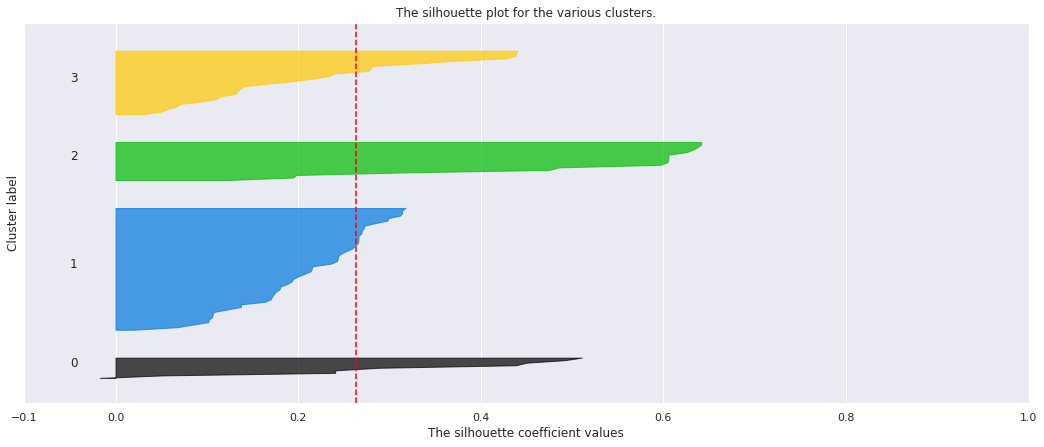

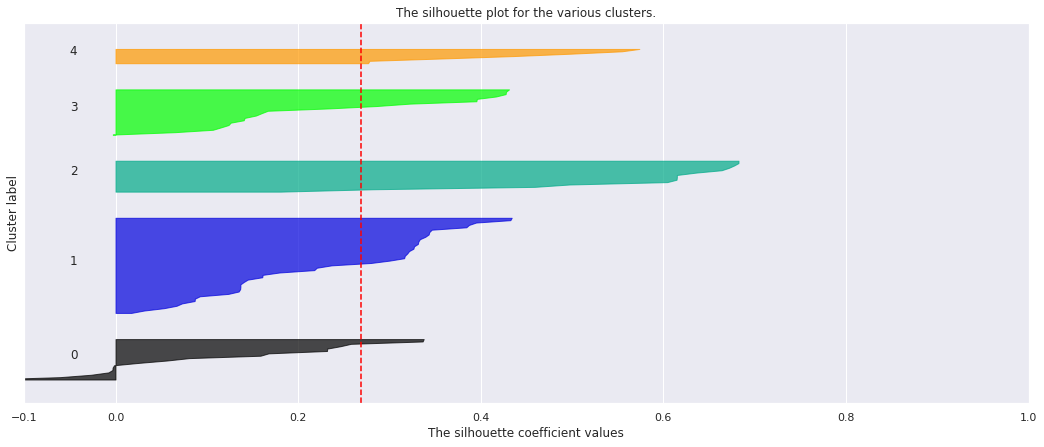

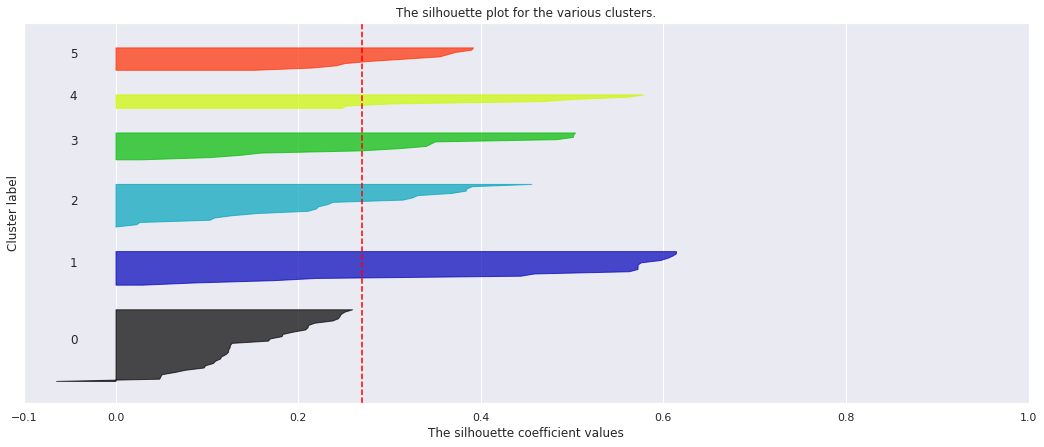

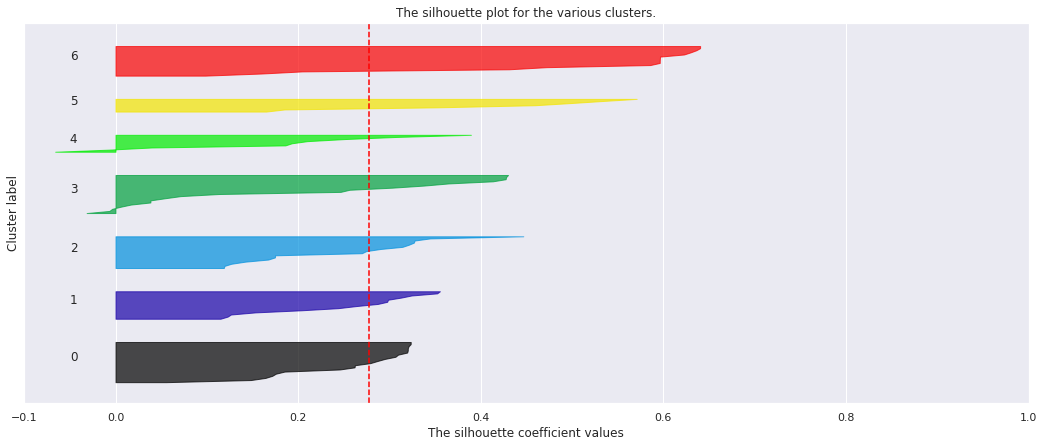

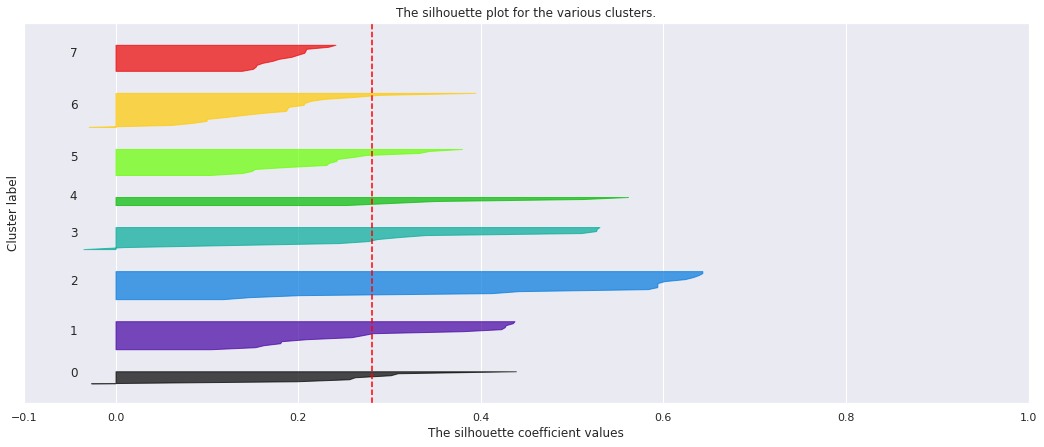

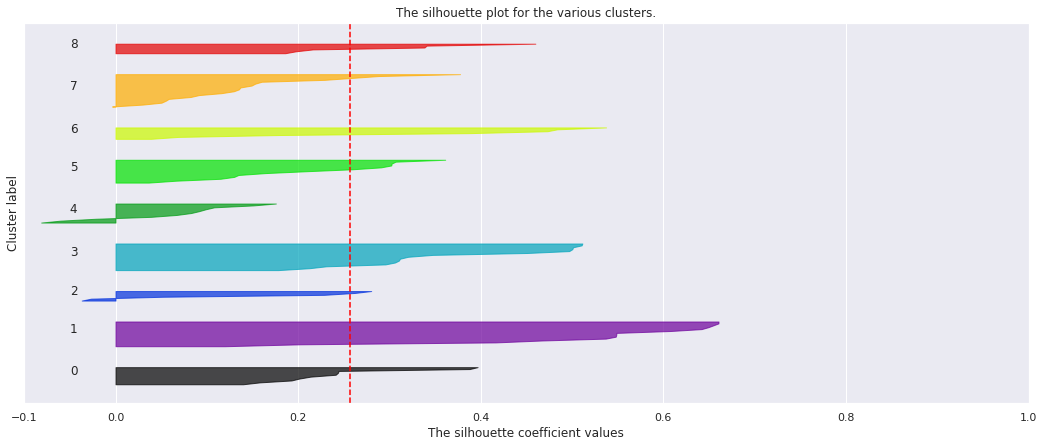

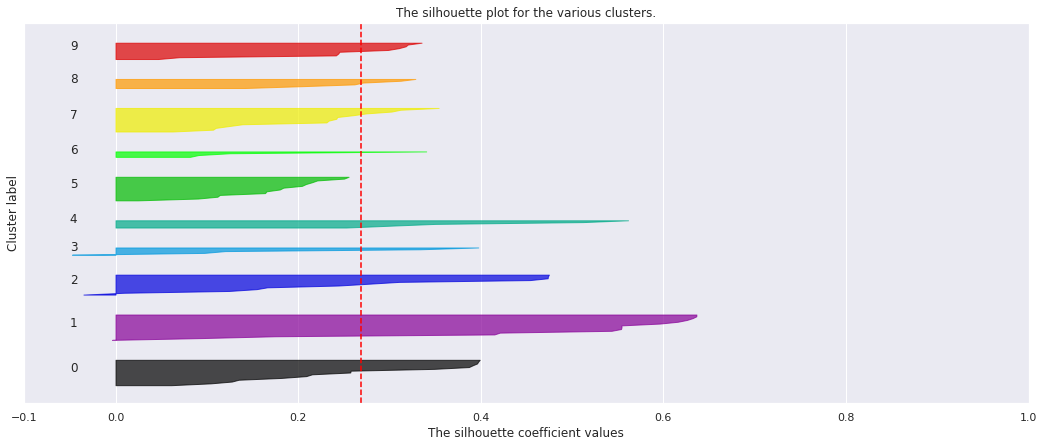

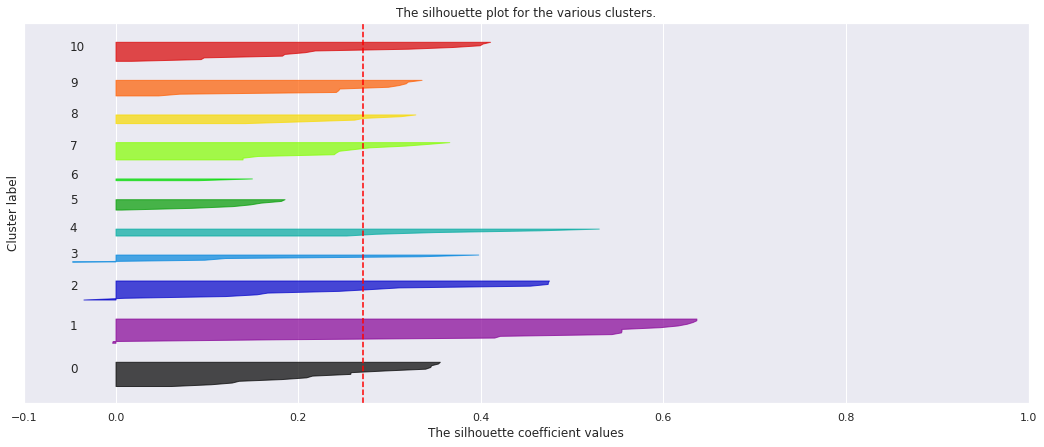

In [144]:
range_n_clusters = list(range(2,12))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

plt.show()

In [145]:
km = KMeans(n_clusters=5, n_init=1000, max_iter=650, random_state=1)
predicted_clusters = km.fit_predict(df_scaled)
predicted_clusters

array([3, 2, 3, 3, 3, 3, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 1, 2, 3, 3, 3, 4,
       3, 3, 1, 2, 3, 3, 3, 4, 4, 3, 0, 4, 4, 2, 2, 3, 3, 3, 2, 2, 3, 4,
       2, 3, 2, 1, 4, 4, 1, 2, 3, 0, 3, 3, 3, 0, 1, 2, 3, 3, 0, 1, 3, 4,
       1, 3, 3, 4, 1, 3, 4, 1, 4, 1, 4, 2, 1, 1, 2, 1, 2, 3, 2, 3, 4, 4,
       4, 0, 4, 4, 4, 0, 3, 3, 3, 4, 2, 4], dtype=int32)

In [146]:
np.unique(km.labels_,return_counts=True,return_index=True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([14,  6,  1,  0, 21]),
 array([ 7, 15, 20, 37, 21]))

In [147]:
km = KMeans(n_clusters=4, n_init=1000, max_iter=650, random_state=1)
predicted_clusters = km.fit_predict(df_scaled)
predicted_clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 3,
       1, 1, 0, 1, 1, 1, 1, 3, 3, 1, 2, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 0, 0, 3, 3, 0, 3, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 3, 3,
       0, 1, 1, 3, 0, 1, 3, 0, 3, 0, 3, 1, 0, 0, 1, 0, 1, 1, 3, 1, 3, 3,
       3, 2, 3, 3, 3, 2, 1, 1, 1, 3, 1, 3], dtype=int32)

In [148]:
np.unique(km.labels_,return_counts=True,return_index=True)

(array([0, 1, 2, 3], dtype=int32),
 array([ 6,  0, 14, 21]),
 array([16, 51,  7, 26]))

In [149]:
km = KMeans(n_clusters=8, n_init=1000, max_iter=650, random_state=1)
predicted_clusters = km.fit_predict(df_scaled)
predicted_clusters

array([3, 3, 1, 5, 1, 3, 6, 7, 0, 3, 3, 0, 6, 1, 4, 7, 6, 0, 1, 5, 1, 5,
       3, 5, 6, 0, 1, 1, 5, 5, 2, 5, 4, 3, 2, 0, 0, 1, 3, 1, 0, 0, 1, 5,
       0, 1, 7, 6, 2, 0, 6, 3, 5, 4, 3, 3, 5, 4, 6, 3, 1, 5, 3, 6, 1, 3,
       6, 1, 3, 5, 6, 1, 2, 6, 2, 6, 2, 7, 6, 6, 7, 6, 0, 5, 0, 1, 5, 2,
       2, 4, 2, 2, 3, 3, 3, 3, 1, 0, 7, 0], dtype=int32)

In [151]:
np.unique(km.labels_,return_counts=True,return_index=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 8,  2, 30,  0, 14,  3,  6,  7]),
 array([14, 17, 10, 19,  5, 14, 15,  6]))

In [150]:
df_cluster['clusters']=predicted_clusters

In [152]:
df_cluster['clusters'].value_counts()

3    19
1    17
6    15
5    14
0    14
2    10
7     6
4     5
Name: clusters, dtype: int64

In [153]:
df_final.head(5)

,Rating,Cost,cuisine_Southeast Asian,cuisine_junk food,cuisine_Continental,cuisine_Mughal food,cuisine_Middle eastern,cuisine_American,cuisine_Dessert,cuisine_Indian
0,2.400,400,1,0,0,0,0,0,0,1
1,2.580,200,1,0,0,0,0,0,0,0
2,2.710,400,1,0,0,1,0,0,0,1
3,2.820,500,1,0,0,0,0,0,0,2
4,2.825,600,0,0,0,2,0,0,0,0


In [154]:
df_cluster.head(5)

,Rating,Name,Cost,number of cuisines,cuisine_Southeast Asian,cuisine_junk food,cuisine_Continental,cuisine_Mughal food,cuisine_Middle eastern,cuisine_American,cuisine_Dessert,cuisine_Indian,clusters
0,2.400,Hotel Zara Hi-Fi,400,2,1,0,0,0,0,0,0,1,3
1,2.580,Asian Meal Box,200,1,1,0,0,0,0,0,0,0,3
2,2.710,Pakwaan Grand,400,3,1,0,0,1,0,0,0,1,1
3,2.820,Mathura Vilas,500,3,1,0,0,0,0,0,0,2,5
4,2.825,Behrouz Biryani,600,2,0,0,0,2,0,0,0,0,1


In [155]:
df_cluster['clusters'].value_counts()

3    19
1    17
6    15
5    14
0    14
2    10
7     6
4     5
Name: clusters, dtype: int64

In [156]:
df_name_new.head(10)

,Rating,Name,Links,Cost,Collections,Cuisines,Timings,cuisines_list,number of cuisines,Collections_list
0,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",North Indian,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
1,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",Mediterranean,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
2,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",European,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
3,4.81,B-Dubs,https://www.zomato.com/hyderabad/b-dubs-gachib...,1600,Hyderabad's Hottest,American,"11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11a...",American,1,[Hyderabad's Hottest]
4,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",North Indian,3,"[Barbecue & Grill, Live Sports Screenings]"
5,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",Mediterranean,3,"[Barbecue & Grill, Live Sports Screenings]"
6,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",European,3,"[Barbecue & Grill, Live Sports Screenings]"
7,4.70,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,North Indian,3,[Hyderabad's Hottest]
8,4.70,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,Chinese,3,[Hyderabad's Hottest]
9,4.70,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,Biryani,3,[Hyderabad's Hottest]


In [157]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 15

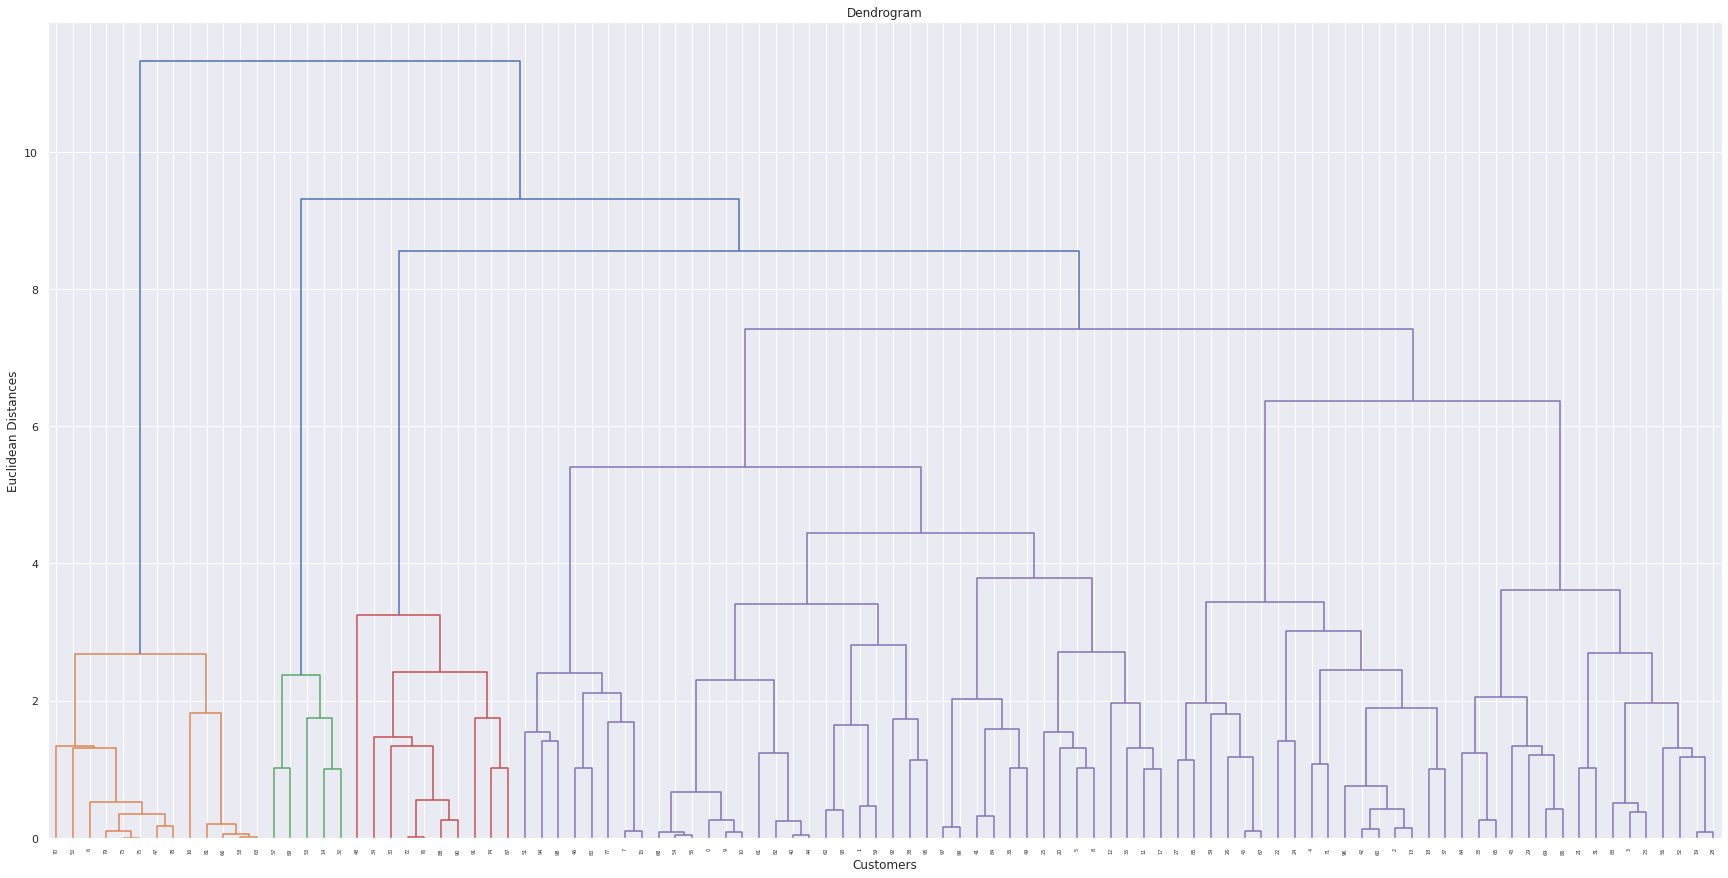

In [158]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

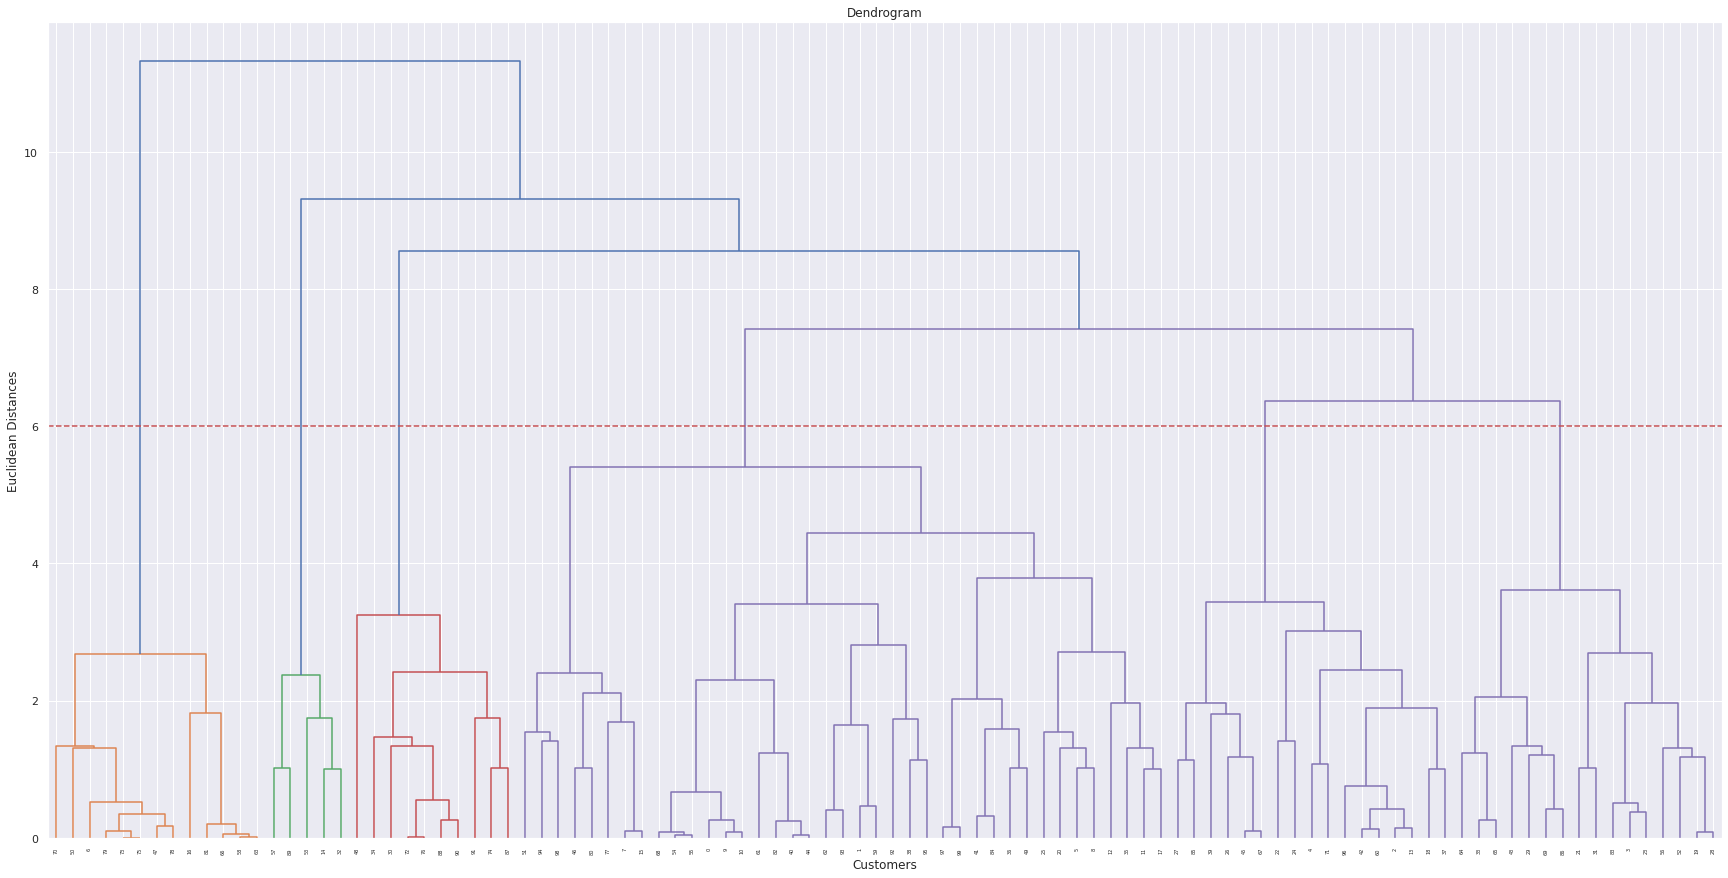

In [159]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line


In [160]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')
predicted_hc = hc.fit_predict(df_scaled)

In [161]:
predicted_hc

array([3, 3, 2, 1, 2, 0, 7, 6, 0, 3, 3, 0, 0, 2, 5, 6, 7, 0, 2, 1, 0, 1,
       2, 1, 2, 0, 2, 2, 1, 1, 4, 1, 5, 1, 4, 0, 0, 2, 3, 2, 3, 0, 2, 1,
       3, 2, 6, 7, 4, 0, 7, 6, 1, 5, 3, 3, 1, 5, 7, 3, 2, 3, 3, 7, 1, 1,
       7, 2, 3, 1, 7, 2, 4, 7, 4, 7, 4, 6, 7, 7, 6, 7, 3, 1, 0, 2, 1, 4,
       4, 5, 4, 4, 3, 3, 6, 3, 2, 0, 6, 0])

In [162]:
np.unique(predicted_hc,return_counts=True,return_index=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 5,  3,  2,  0, 30, 14,  7,  6]),
 array([14, 16, 17, 17, 10,  5,  8, 13]))

In [163]:
df_cluster['clusters_hc']=predicted_hc

In [164]:
df_cluster[['clusters','clusters_hc']]

,clusters,clusters_hc
0,3,3
1,3,3
2,1,2
3,5,1
4,1,2
...,...,...
95,3,3
96,1,2
97,0,0
98,7,6


Text(0, 0.5, 'Rating')

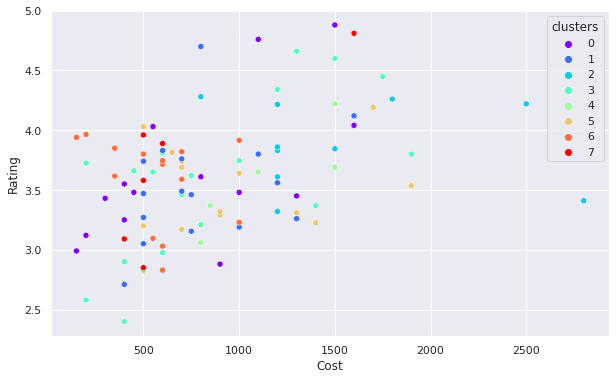

In [165]:
# Plot the clusters

plt.figure(figsize=[10, 6])
sns.scatterplot(x = df_cluster['Cost'], y = df_cluster['Rating'], hue = df_cluster['clusters'], palette='rainbow', legend = 'full')
plt.xlabel('Cost')
plt.ylabel('Rating')

In [166]:
df_sec=df_name_new[['Rating','Name','Cost','cuisines_list']].copy()

In [167]:
df_sec.head(3)

,Rating,Name,Cost,cuisines_list
0,4.88,AB's - Absolute Barbecues,1500,North Indian
1,4.88,AB's - Absolute Barbecues,1500,Mediterranean
2,4.88,AB's - Absolute Barbecues,1500,European


In [168]:
df_sec_d=pd.get_dummies(df_sec,columns=['cuisines_list'],prefix=None)

In [169]:
df_sec_d

,Rating,Name,Cost,cuisines_list_American,cuisines_list_Andhra,cuisines_list_Arabian,cuisines_list_Asian,cuisines_list_BBQ,cuisines_list_Bakery,cuisines_list_Beverages,...,cuisines_list_North Indian,cuisines_list_Pizza,cuisines_list_Salad,cuisines_list_Seafood,cuisines_list_South Indian,cuisines_list_Spanish,cuisines_list_Street Food,cuisines_list_Sushi,cuisines_list_Thai,cuisines_list_Wraps
0,4.88,AB's - Absolute Barbecues,1500,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,4.88,AB's - Absolute Barbecues,1500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.88,AB's - Absolute Barbecues,1500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.81,B-Dubs,1600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.76,"3B's - Buddies, Bar & Barbecue",1100,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2.71,Pakwaan Grand,400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,2.71,Pakwaan Grand,400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,2.58,Asian Meal Box,200,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,2.40,Hotel Zara Hi-Fi,400,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [170]:
cuisine_list=list(set(df_sec_d.columns)-set(['Name','Cost','Rating']))


In [171]:
len(cuisine_list)

42

In [172]:
df_sec_d=df_sec_d.groupby(['Rating','Name','Cost'])[cuisine_list].sum()

In [173]:
df_sec_d.head(5)

,,,cuisines_list_Juices,cuisines_list_Momos,cuisines_list_Cafe,cuisines_list_Bakery,cuisines_list_Finger Food,cuisines_list_Street Food,cuisines_list_Pizza,cuisines_list_BBQ,cuisines_list_Indonesian,cuisines_list_Biryani,...,cuisines_list_Japanese,cuisines_list_Lebanese,cuisines_list_Salad,cuisines_list_American,cuisines_list_Seafood,cuisines_list_Modern Indian,cuisines_list_Italian,cuisines_list_Desserts,cuisines_list_Fast Food,cuisines_list_Chinese
Rating,Name,Cost,,,,,,,,,,,,,,,,,,,,,
2.400,Hotel Zara Hi-Fi,400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.580,Asian Meal Box,200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.710,Pakwaan Grand,400,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2.820,Mathura Vilas,500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.825,Behrouz Biryani,600,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [174]:
df_sec_d.reset_index(level=[0,1,2],inplace=True)

In [175]:
len(df_sec_d.columns.tolist())

45

In [176]:
df_sec_d2=df_sec_d.drop(['Name'],axis=1)

In [177]:
df_sec_d2.head(3)

,Rating,Cost,cuisines_list_Juices,cuisines_list_Momos,cuisines_list_Cafe,cuisines_list_Bakery,cuisines_list_Finger Food,cuisines_list_Street Food,cuisines_list_Pizza,cuisines_list_BBQ,...,cuisines_list_Japanese,cuisines_list_Lebanese,cuisines_list_Salad,cuisines_list_American,cuisines_list_Seafood,cuisines_list_Modern Indian,cuisines_list_Italian,cuisines_list_Desserts,cuisines_list_Fast Food,cuisines_list_Chinese
0,2.40,400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.58,200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.71,400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [178]:
x_2=list(set(list(df_sec_d2.columns))-{'Rating','Cost'})

In [179]:
x_2

['cuisines_list_Juices',
 'cuisines_list_Momos',
 'cuisines_list_Cafe',
 'cuisines_list_Bakery',
 'cuisines_list_Finger Food',
 'cuisines_list_Street Food',
 'cuisines_list_Pizza',
 'cuisines_list_BBQ',
 'cuisines_list_Indonesian',
 'cuisines_list_Biryani',
 'cuisines_list_European',
 'cuisines_list_Mughlai',
 'cuisines_list_Sushi',
 'cuisines_list_Continental',
 'cuisines_list_Thai',
 'cuisines_list_Wraps',
 'cuisines_list_North Indian',
 'cuisines_list_Mexican',
 'cuisines_list_North Eastern',
 'cuisines_list_Mediterranean',
 'cuisines_list_Asian',
 'cuisines_list_Healthy Food',
 'cuisines_list_Spanish',
 'cuisines_list_Goan',
 'cuisines_list_Arabian',
 'cuisines_list_Hyderabadi',
 'cuisines_list_Ice Cream',
 'cuisines_list_South Indian',
 'cuisines_list_Andhra',
 'cuisines_list_Beverages',
 'cuisines_list_Kebab',
 'cuisines_list_Burger',
 'cuisines_list_Japanese',
 'cuisines_list_Lebanese',
 'cuisines_list_Salad',
 'cuisines_list_American',
 'cuisines_list_Seafood',
 'cuisines_list_

In [180]:
df_sec_scaled=ms.fit_transform(df_sec_d2[['Rating','Cost']])
df_sec_scaled

array([[0.        , 0.09433962],
       [0.07258065, 0.01886792],
       [0.125     , 0.09433962],
       [0.16935484, 0.13207547],
       [0.17137097, 0.16981132],
       [0.1733871 , 0.13207547],
       [0.1733871 , 0.16981132],
       [0.18145161, 0.13207547],
       [0.19354839, 0.28301887],
       [0.2016129 , 0.09433962],
       [0.23185484, 0.16981132],
       [0.23790323, 0.        ],
       [0.25403226, 0.16981132],
       [0.26209677, 0.13207547],
       [0.26612903, 0.24528302],
       [0.27822581, 0.09433962],
       [0.28024194, 0.1509434 ],
       [0.29032258, 0.01886792],
       [0.30443548, 0.22641509],
       [0.31048387, 0.20754717],
       [0.31854839, 0.32075472],
       [0.32258065, 0.13207547],
       [0.3266129 , 0.24528302],
       [0.33266129, 0.47169811],
       [0.33467742, 0.32075472],
       [0.34274194, 0.09433962],
       [0.34677419, 0.43396226],
       [0.35080645, 0.13207547],
       [0.35887097, 0.28301887],
       [0.36693548, 0.43396226],
       [0.

In [181]:
df_sec_sc=pd.concat([pd.DataFrame({'Rating':list(df_sec_scaled[:,0]),'Cost':list(df_sec_scaled[:,1])}),df_sec_d2[x_2]],axis=1)

In [182]:
df_sec_sc.head()

,Rating,Cost,cuisines_list_Juices,cuisines_list_Momos,cuisines_list_Cafe,cuisines_list_Bakery,cuisines_list_Finger Food,cuisines_list_Street Food,cuisines_list_Pizza,cuisines_list_BBQ,...,cuisines_list_Japanese,cuisines_list_Lebanese,cuisines_list_Salad,cuisines_list_American,cuisines_list_Seafood,cuisines_list_Modern Indian,cuisines_list_Italian,cuisines_list_Desserts,cuisines_list_Fast Food,cuisines_list_Chinese
0,0.000000,0.094340,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.072581,0.018868,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.125000,0.094340,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.169355,0.132075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.171371,0.169811,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
from sklearn import metrics

k_range = range(2, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df_sec_sc.values)
    scores.append(metrics.silhouette_score(df_sec_sc.values, km.labels_))

In [184]:
scores

[0.15207915744795322,
 0.1407503012515323,
 0.13344706027227482,
 0.11611049800214106,
 0.13814361793297422,
 0.14402536752874517,
 0.12139324285093993,
 0.13128794851325165,
 0.13412072803172073,
 0.1351876488487966]

In [185]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [186]:
stop_words = stopwords.words('english')


In [187]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [188]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [189]:
df_rev.head(1)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Number of Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0


In [190]:
df_rev['Review']=df_rev['Review'].apply(remove_punctuation)

In [191]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [192]:
df_rev['Review']=df_rev['Review'].apply(stopwords)

In [193]:
df_rev['Review'].head(10)

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen das arun great guy behavior sincerety g...
4    food goodwe ordered kodi drumsticks basket mut...
5    ambiance good service good food apradeecp subr...
6    nice place ambience different food ordered tas...
7    well reading many reviews finally visited plac...
8    excellent food specially like spicy food court...
9    came birthday treat close friend perfect place...
Name: Review, dtype: object

In [194]:
df_rev['sentiments'] = df_rev['Rating'].apply(lambda Rating : 1 if Rating > 3.5 else (0 if 2 <= Rating <= 3.5 else -1))


In [195]:
df_rev['sentiments'].value_counts()

 1    6268
 0    1942
-1    1744
Name: sentiments, dtype: int64

In [197]:
sentiments = {1:[4,5,'Positive '],0:[3,3.5,'Neutral '],-1:[1,2.5,'Negative ']}


In [198]:
sentiment=1

In [199]:
df1 = df_rev[(df_rev['Rating']>=sentiments[sentiment][0]) & (df_rev['Rating']<=sentiments[sentiment][1])]


In [200]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [201]:
cv = CountVectorizer(ngram_range= (3,3))
total_words = cv.fit_transform(df1['Review'])

In [202]:
count = total_words.sum(axis = 0)


In [203]:
count.shape

(1, 148961)

In [204]:
freq_df = pd.DataFrame((word, count[0, idx]) for word, idx in cv.vocabulary_.items())


In [205]:
freq_df.columns=[sentiments[sentiment][2]+'Words','Frequency']
freq_df

,Positive Words,Frequency
0,ambience good food,27
1,good food quite,1
2,food quite good,5
3,quite good saturday,1
4,good saturday lunch,1
...,...,...
148956,celebrations perfect crowd,1
148957,perfect crowd got,1
148958,crowd got attention,1
148959,got attention service,1


In [215]:
from sklearn.feature_extraction.text import CountVectorizer

def most_frequent_words(sentiment,n):

    #positive sentiment if ratings >= 4
    #negative sentiment if ratings < 2
    #neutral sentiment if 3 < ratings < 4
    if sentiment is 'Positive':
      x1=4
      x2=5
    elif sentiment is 'Neutral':
      x1=3
      x2=3.5
    elif sentiment is 'Negative':
      x1=1
      x2=2.5


    df1 = df_rev[(df_rev['Rating']>=x1) & (df_rev['Rating']<=x2)]

    #converts words into vectors based on count
    cv = CountVectorizer(ngram_range= (n,n))
    total_words = cv.fit_transform(df1['Review'])
    
    #Will count the total number if occurances of each word in all reviews
    count = total_words.sum(axis = 0)
    
    #storing and sorting them in a list of tuples
    freq_df = pd.DataFrame((word, count[0, idx]) for word, idx in cv.vocabulary_.items())
    freq_df.columns=[sentiment+' '+'Words','Frequency']
    freq_df = freq_df.sort_values(by='Frequency',ascending=False)
    
    return freq_df.reset_index().drop('index',axis=1)

In [220]:
positive_df = most_frequent_words('Positive',4)
neutral_df = most_frequent_words('Neutral',4)
negative_df = most_frequent_words('Negative',4)

In [221]:
neg_pos = pd.concat([negative_df['Negative Words'][:20], positive_df['Positive Words'][:20]],axis=1)
total = pd.concat([neg_pos, neutral_df['Neutral Words'][:20]],axis=1)
total

,Negative Words,Positive Words,Neutral Words
0,please dont order food,good place hangout friends,raju gari kodi pulao
1,100 times better biryani,nice place hangout friends,want asif want asif
2,please dont waste money,excellent food excellent service,yum yum tree one
3,double egg double chicken,good food good service,food 35 service 45
4,starters good main course,would love visit place,cheesy melt paneer wrap
5,quantity sucks service quantity,nice place good food,good taste main course
6,sucks service quantity sucks,would definitely recommend place,paneer tikka masala roll
7,service quantity sucks service,good north indian food,asif want asif want
8,biryani taste good biryani,good place hang friends,options veg non veg
9,ordered special chicken shawarma,nice place paradise gachibowli,service good staff courteous


In [222]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

#applying stemmer
df_rev['Review'] = df_rev['Review'].apply(stemming)

In [225]:
# Applying train test split

X = df_rev['Review']
y = df_rev['sentiments']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [226]:
y_train.value_counts()

 1    5014
 0    1554
-1    1395
Name: sentiments, dtype: int64

In [227]:
y_test.value_counts()

 1    1254
 0     388
-1     349
Name: sentiments, dtype: int64

In [229]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [232]:
train_array= X_train_vec.toarray()
test_array = X_test_vec.toarray()

In [233]:
tfidf_df=pd.DataFrame(train_array,columns=vectorizer.get_feature_names())
tfidf_df

,015,03feb2019,04,05,055,05th,0635,0kms,10,100,...,zomtato,zone,zoneincreas,zonequ,zoomato,zucchini,zyada,àlacart,ànd,éclat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(class_weight='balanced',random_state=0)
model.fit(X_train_vec,y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [235]:
lr_score = model.score(X_test_vec, y_test)
print("Results for Logistic Regression")
print(lr_score)

Results for Logistic Regression
0.7759919638372677
